## Physique des marchés, TP1 : faits stylisés

#### 2.1 Données journalières

In [64]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sys

[*********************100%***********************]  1 of 1 completed


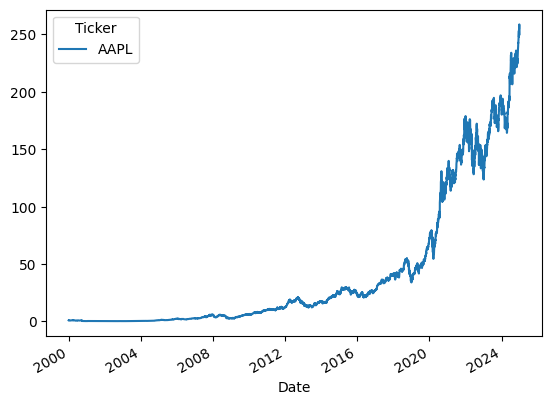

In [65]:
AAPL_daily = yf.download('AAPL', start='2000-01-01', end='2025-01-01')
AAPL_daily['Close'].plot()
plt.show()

In [66]:
AAPL_daily

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.842151,0.846382,0.765036,0.789017,535796800
2000-01-04,0.771149,0.832276,0.761274,0.814408,512377600
2000-01-05,0.782433,0.831806,0.774910,0.780553,778321600
2000-01-06,0.714723,0.805004,0.714723,0.798421,767972800
2000-01-07,0.748578,0.759864,0.718485,0.726008,460734400
...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


#### 2.2 Données intraday

In [67]:
def load_TRTH_bbo(filename,
             tz_exchange="America/New_York",
             open_time="09:30:00",
             close_time="16:00:00",
             only_regular_trading_hours=True):
    
    DF = pd.read_csv(filename)

    DF.index = pd.to_datetime(DF["xltime"],unit="d",origin="1899-12-30",utc=True)
    DF.index = DF.index.tz_convert(tz_exchange)  # .P stands for Arca, which is based at New York
    DF.drop(columns="xltime",inplace=True)
    
    if only_regular_trading_hours:
        DF=DF.between_time(open_time,close_time)    # warning: ever heard e.g. about Thanksgivings?
        
    return DF

In [68]:
Path = sys.path[0]
AAPL_intraday = load_TRTH_bbo("2017-01-03-AAPL.OQ-bbo.csv.gz")
AAPL_intraday

,bid-price,bid-volume,ask-price,ask-volume
xltime,,,,
2017-01-03 09:30:00.074000471-05:00,115.81,5,115.82,415
2017-01-03 09:30:00.074000471-05:00,115.80,4,115.82,415
2017-01-03 09:30:00.083000750-05:00,115.80,18,115.82,415
2017-01-03 09:30:00.093000565-05:00,115.80,18,115.82,475
2017-01-03 09:30:00.113000212-05:00,115.80,18,115.82,474
...,...,...,...,...
2017-01-03 16:00:00-05:00,116.13,234,116.15,11
2017-01-03 16:00:00-05:00,116.13,173,116.15,11
2017-01-03 16:00:00-05:00,116.13,169,116.15,11


#### 3. Calcul des rendements

#### 3.1 Données journalières

In [69]:
AAPL_daily["Returns"] = np.log(AAPL_daily['Close']).diff().values
AAPL_daily.dropna()

Price,Close,High,Low,Open,Volume,Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2000-01-04,0.771149,0.832276,0.761274,0.814408,512377600,-0.088078
2000-01-05,0.782433,0.831806,0.774910,0.780553,778321600,0.014527
2000-01-06,0.714723,0.805004,0.714723,0.798421,767972800,-0.090514
2000-01-07,0.748578,0.759864,0.718485,0.726008,460734400,0.046281
2000-01-10,0.735412,0.769267,0.712842,0.767386,505064000,-0.017745
...,...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011413
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,0.003171


#### 3.2 Données intraday 

In [70]:
AAPL_intraday["Mid"] = (AAPL_intraday["bid-price"] + AAPL_intraday["ask-price"])/2
AAPL_intraday.dropna(subset=["Mid"])
AAPL_intraday.head()

,bid-price,bid-volume,ask-price,ask-volume,Mid
xltime,,,,,
2017-01-03 09:30:00.074000471-05:00,115.81,5,115.82,415,115.815
2017-01-03 09:30:00.074000471-05:00,115.80,4,115.82,415,115.810
2017-01-03 09:30:00.083000750-05:00,115.80,18,115.82,415,115.810
2017-01-03 09:30:00.093000565-05:00,115.80,18,115.82,475,115.810
2017-01-03 09:30:00.113000212-05:00,115.80,18,115.82,474,115.810


In [71]:
# Calculer les rendements à 5 secondes ou plus (resample)
AAPL_intraday = AAPL_intraday.resample("5S").last()

C:\Users\boist\AppData\Local\Temp\ipykernel_9460\2408636341.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  AAPL_intraday = AAPL_intraday.resample("5S").last()


In [72]:
AAPL_intraday["Returns"] = np.log(AAPL_intraday["Mid"]).diff().values
AAPL_intraday.head()

,bid-price,bid-volume,ask-price,ask-volume,Mid,Returns
xltime,,,,,,
2017-01-03 09:30:00-05:00,115.76,1.0,115.79,1.0,115.775,NaN
2017-01-03 09:30:05-05:00,115.70,5.0,115.77,2.0,115.735,-0.000346
2017-01-03 09:30:10-05:00,115.71,2.0,115.75,3.0,115.730,-0.000043
2017-01-03 09:30:15-05:00,115.56,2.0,115.73,1.0,115.645,-0.000735
2017-01-03 09:30:20-05:00,115.50,31.0,115.69,2.0,115.595,-0.000432


#### 4. Analyse Empirique 

#### 4.1 Rendements : types de distribution

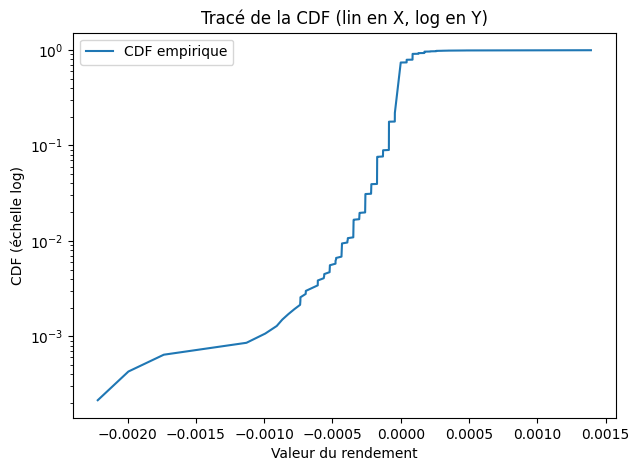

In [73]:
from statsmodels.distributions.empirical_distribution import ECDF
data = AAPL_intraday["Returns"]
# Calcul de l'ECDF
ecdf = ECDF(data)

# Tracé de la CDF avec échelle lin (X) / log (Y)
x_vals = np.sort(data)
y_vals = ecdf(x_vals)

plt.figure(figsize=(7, 5))
plt.plot(x_vals, y_vals, label='CDF empirique')
plt.yscale('log')  # Échelle log sur l’axe Y
plt.xlabel('Valeur du rendement')
plt.ylabel('CDF (échelle log)')
plt.title("Tracé de la CDF (lin en X, log en Y)")
plt.legend()
plt.show()

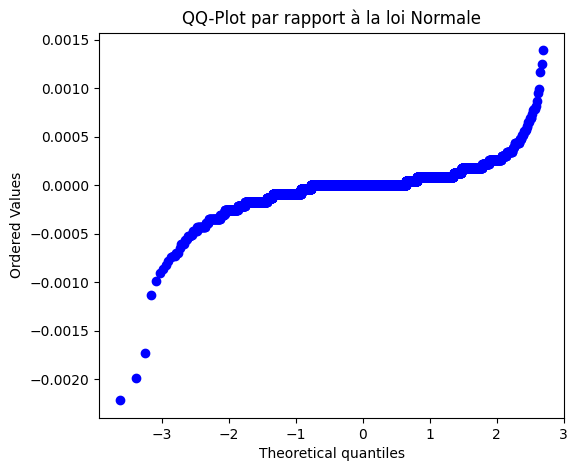

In [74]:
# QQ-plot des données
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
st.probplot(data, dist="norm", plot=ax)
ax.set_title("QQ-Plot par rapport à la loi Normale")
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Estimation de l'exposant alpha = 4.1714174382363565
xmin estimé = 0.0006944143328393437


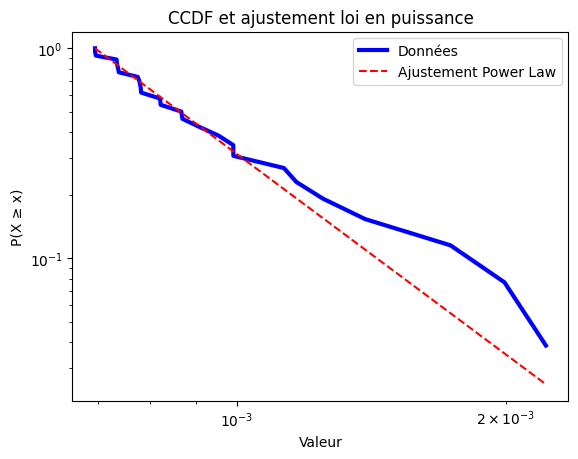

In [76]:
import powerlaw

# On se concentre sur la partie positive des rendements absolus par exemple
# ou bien sur le maximum de la queue (au-delà d’un certain quantile).
# Pour l’exemple, on prend la partie positive des données
data_positive = np.abs(data)

# Fit power law
fit = powerlaw.Fit(data_positive, xmin=None)  # xmin=None => déterminé automatiquement
alpha = fit.alpha
xmin = fit.xmin

print("Estimation de l'exposant alpha =", alpha)
print("xmin estimé =", xmin)

# Tracé comparatif
figCCDF = fit.plot_ccdf(linewidth=3, label='Données', color='blue')
fit.power_law.plot_ccdf(ax=figCCDF, color='red', linestyle='--', label='Ajustement Power Law')
plt.legend()
plt.title("CCDF et ajustement loi en puissance")
plt.xlabel("Valeur")
plt.ylabel("P(X ≥ x)")
plt.show()
